# Imports

In [1]:
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'

# Plot samples

In [3]:
%run ../tools/augmentation.py
%run ../cxr14.py
%run ../jsrt.py

In [4]:
kwargs = {
    'crop': None,
    'translate': None,
    'shear': None,
    'rotation': None,
    'contrast': None,
    'brightness': None,
    'noise_gaussian': 0.1,
}

dataset = JSRTDataset(image_format='L')
aug_dataset = Augmentator(dataset, dont_shuffle=True, **kwargs)
len(dataset), len(aug_dataset)

(247, 494)

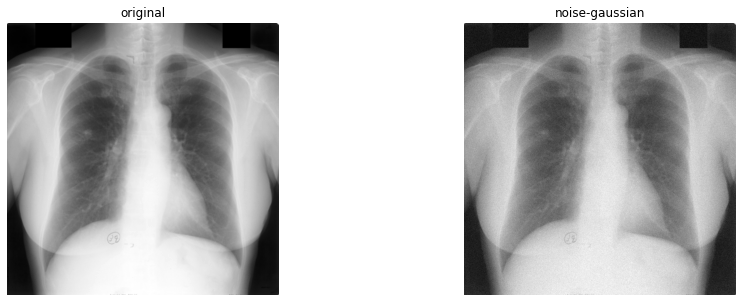

In [9]:
aug_dataset.plot_augmented_samples(3)

In [8]:
sample_idx = 0
n_methods = len(aug_dataset._aug_fns)

start_idx = sample_idx * (n_methods + 1)
for i, method in enumerate(['original'] + list(aug_dataset._aug_fns)):
    idx = start_idx + i
    image = aug_dataset[idx].image
    print(f'{method:10}\t', image.type(), image.size(), image.min(), image.max())

original  	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-2.1756) tensor(1.4834)
contrast-down	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-0.5255) tensor(0.3067)
contrast-up	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-2.1756) tensor(1.4834)
brightness-down	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-2.1756) tensor(0.6224)
brightness-up	 torch.FloatTensor torch.Size([1, 512, 512]) tensor(-2.1756) tensor(1.4834)


# Gaussian noise

In [33]:
%run ../../utils/common.py

In [34]:
dataset2 = JSRTDataset(image_format='RGB')
len(dataset2)

247

In [35]:
item = dataset2[3]
image = item.image
image.size()

torch.Size([3, 512, 512])

In [36]:
image.min(), image.max()

(tensor(-2.1756), tensor(1.4834))

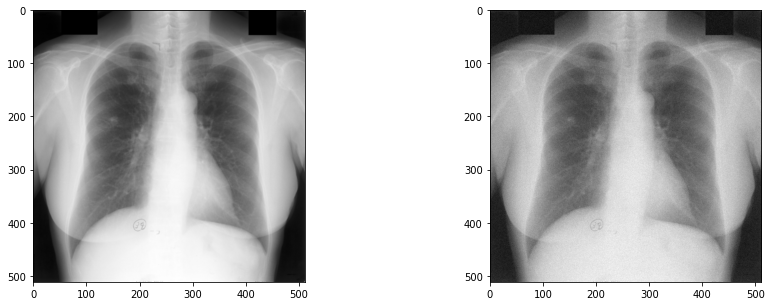

In [50]:
image2 = image + torch.randn(image.size()[-2:], device=image.device) * 0.1
# image3 = tensor_to_range01(image) + torch.randn(image.size(), device=image.device) * 0.1

plt.figure(figsize=(15, 5))
n_rows = 2

plt.subplot(1, n_rows, 1)
plt.imshow(tensor_to_range01(image).permute(1, 2, 0), cmap='gray')

plt.subplot(1, n_rows, 2)
plt.imshow(tensor_to_range01(image2).permute(1, 2, 0), cmap='gray')

# plt.subplot(1, 3, 3)
# plt.imshow(image3, cmap='gray')

In [51]:
noise = (image - image2)
noise.min(), noise.max(), noise.mean()

(tensor(-0.5045), tensor(0.4750), tensor(-0.0002))